# ***Statistics Advanced - 2| Assignment***

---



**1. What is hypothesis testing in statistics?**

**Answer:**
Hypothesis testing is a formal statistical procedure used to decide whether to accept or reject a claim (hypothesis) about a population parameter based on sample data. It uses a test statistic and probability (p-value) to assess evidence against a null hypothesis.

**2. What is the null hypothesis, and how does it differ from the alternative hypothesis?**

**Answer:**

Null hypothesis (H₀): The default statement that nothing unusual is happening (e.g., the population mean = 50).

Alternative hypothesis (H₁ or Ha): The statement that contradicts H₀ (e.g., the population mean ≠ 50).
Decision is made by comparing the test statistic or p-value with the significance level α.

**3. Explain the significance level in hypothesis testing and its role in deciding the outcome of a test.**

**Answer:**
The significance level (α) is the threshold probability for rejecting H₀ (common values: 0.05, 0.01). If p ≤ α, we reject H₀ (result is statistically significant). If p > α, we fail to reject H₀. The choice of α controls the risk of Type I error (false positive).

**4. What are Type I and Type II errors? Give examples of each.**
**Answer: **

Type I error (α): Rejecting a true null hypothesis (false positive).
Example: Concluding a drug works when it actually doesn’t.

Type II error (β): Failing to reject a false null hypothesis (false negative).
Example: Concluding a drug has no effect when it actually does.

Trade-off: lowering α usually increases β, and vice versa.

**5. What is the difference between a Z-test and a T-test? Explain when to use each.**
**Answer:**

Z-test: Used when population standard deviation (σ) is known, or sample size is large (n ≳ 30) and normality approximately holds. Test statistic uses the normal distribution.

T-test: Used when σ is unknown and sample size is small; it uses Student’s t-distribution (degrees of freedom = n−1).
Use z-test if σ known; otherwise use t-test (or if sample is small and distribution not normal, consider nonparametric tests).

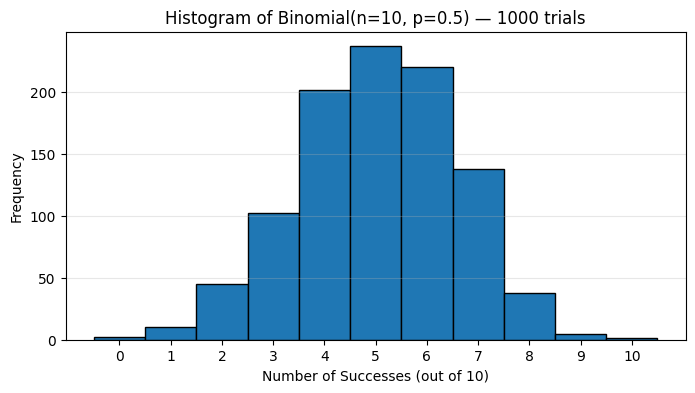

In [2]:
#6. Write a Python program to generate a binomial distribution with n=10 and p=0.5, then plot its histogram.
# Q6: Binomial distribution (n=10, p=0.5) and histogram
import numpy as np
import matplotlib.pyplot as plt

# Generate 1000 experiments of 10 Bernoulli trials
n, p, trials = 10, 0.5, 1000
samples = np.random.binomial(n, p, size=trials)

# Plot histogram (counts of successes from 0..10)
plt.figure(figsize=(8,4))
plt.hist(samples, bins=range(0, n+2), align='left', edgecolor='black')
plt.xticks(range(0, n+1))
plt.xlabel("Number of Successes (out of 10)")
plt.ylabel("Frequency")
plt.title("Histogram of Binomial(n=10, p=0.5) — 1000 trials")
plt.grid(axis='y', alpha=0.3)
plt.show()


In [3]:
#7. Implement hypothesis testing using Z-statistics for a sample dataset in Python. Show code and interpret results.\
#Data provided:
#sample_data = [49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6,
#50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5,
#50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9,
#50.3, 50.4, 50.0, 49.7, 50.5, 49.9]
# Q7: Z-test (assume known sigma) and T-test (sigma unknown)
import numpy as np
import scipy.stats as st

sample_data = [49.1,50.2,51.0,48.7,50.5,49.8,50.3,50.7,50.2,49.6,
               50.1,49.9,50.8,50.4,48.9,50.6,50.0,49.7,50.2,49.5,
               50.1,50.3,50.4,50.5,50.0,50.7,49.3,49.8,50.2,50.9,
               50.3,50.4,50.0,49.7,50.5,49.9]

xbar = np.mean(sample_data)
s = np.std(sample_data, ddof=1)
n = len(sample_data)
mu0 = 50.0  # Null hypothesis mean

print("Sample mean:", xbar)
print("Sample std (s):", s)
print("n =", n)

# --- Z-test (assume known population sigma) ---
sigma_known = 0.5  # example assumed population stdev
z_stat = (xbar - mu0) / (sigma_known / np.sqrt(n))
p_value_z_two_tailed = 2 * (1 - st.norm.cdf(abs(z_stat)))

print("\nZ-test (sigma known = {:.2f}):".format(sigma_known))
print("Z-statistic:", z_stat)
print("Two-tailed p-value:", p_value_z_two_tailed)

# --- T-test (sigma unknown) ---
t_stat, p_value_t = st.ttest_1samp(sample_data, mu0)
print("\nT-test (sigma unknown):")
print("T-statistic:", t_stat)
print("Two-tailed p-value:", p_value_t)

# Interpretation with alpha = 0.05
alpha = 0.05
if p_value_t < alpha:
    print("\nResult: Reject H0 at alpha =", alpha)
else:
    print("\nResult: Fail to reject H0 at alpha =", alpha)


Sample mean: 50.08888888888889
Sample std (s): 0.5365379910807955
n = 36

Z-test (sigma known = 0.50):
Z-statistic: 1.0666666666666629
Two-tailed p-value: 0.2861223843910199

T-test (sigma unknown):
T-statistic: 0.9940271559503017
Two-tailed p-value: 0.3270325549821643

Result: Fail to reject H0 at alpha = 0.05


Sample mean: 99.32114938764708
Sample std: 14.812905685417691
95% CI for mean: (np.float64(98.40193918189915), np.float64(100.24035959339501))


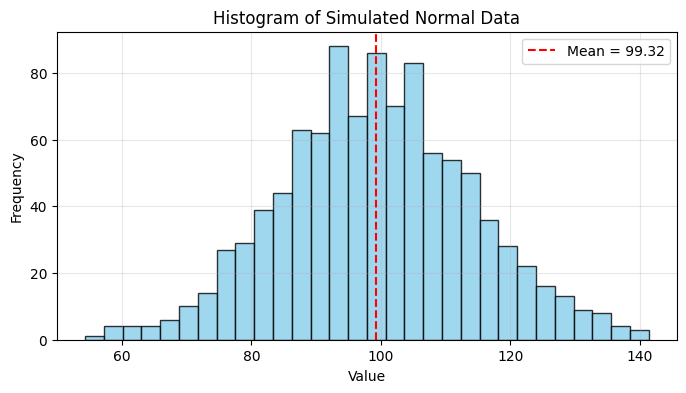

In [4]:
#8. Write a Python script to simulate data from a normal distribution and calculate the 95% confidence interval for its mean. Plot the data.
# Q8: Simulate normal data and compute 95% CI for mean
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# Simulate data
np.random.seed(0)
data = np.random.normal(loc=100, scale=15, size=1000)  # mean=100, sd=15

# Sample stats
mean = np.mean(data)
std = np.std(data, ddof=1)
n = len(data)
se = std / np.sqrt(n)

# 95% CI using t-distribution
ci = st.t.interval(0.95, df=n-1, loc=mean, scale=se)

print("Sample mean:", mean)
print("Sample std:", std)
print("95% CI for mean:", ci)

# Plot histogram
plt.figure(figsize=(8,4))
plt.hist(data, bins=30, color='skyblue', edgecolor='black', alpha=0.8)
plt.axvline(mean, color='red', linestyle='--', label=f"Mean = {mean:.2f}")
plt.title("Histogram of Simulated Normal Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Z-scores: [-1.35050724 -0.88935843 -0.42820961 -0.19763521  0.49408801  0.95523683
  1.41638564]


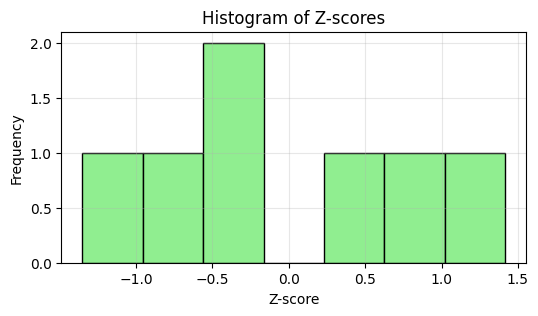

In [5]:
#9. Write a Python function to calculate the Z-scores from a dataset and visualize the standardized data using a histogram. Explain Z-scores
# Q9: Z-scores function and histogram
import numpy as np
import matplotlib.pyplot as plt

def z_scores(data):
    data = np.array(data)
    mu = data.mean()
    sigma = data.std(ddof=1)
    return (data - mu) / sigma

# Example dataset
data_example = [10, 12, 14, 15, 18, 20, 22]
z = z_scores(data_example)
print("Z-scores:", z)

# Plot histogram of z-scores
plt.figure(figsize=(6,3))
plt.hist(z, bins=7, edgecolor='black', color='lightgreen')
plt.title("Histogram of Z-scores")
plt.xlabel("Z-score")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()
